In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv3D, MaxPooling3D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


# Importing Dataset from Google Drive on Colab

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open("/content/drive/My Drive/Colab Notebooks/training_images.pkl","rb") as file:
      images_array = pickle.load(file)
      images_array = np.array(images_array)

# Dataset Details

In [4]:
print(images_array.shape)
training_set = images_array[:10000,:].astype('float32')
training_set = training_set/255.
test_set = images_array[10000:14000,:].astype('float32')
test_set = test_set/255.
print(training_set.shape)
print(test_set.shape)

(14000, 128, 128, 3)
(10000, 128, 128, 3)
(4000, 128, 128, 3)


# Building the model:

In [5]:
input_img = Input(shape=(128, 128, 3))    # adapt this if using 'channels_first' image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (16, 16, 8)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [0]:
autoencoder = Model(input_img, decoded)

# Model Architecture:

In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0   

# Training the model:

In [9]:
#tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,write_graph=True,write_grads=True,batch_size=32,write_images=True)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

#autoencoder.fit(training_set, training_set, epochs=30, batch_size=64, shuffle=True, validation_data=(test_set, test_set), callbacks = [tbCallBack],verbose=1)
autoencoder.fit(training_set, training_set, epochs=40, batch_size=64, shuffle=True, validation_data=(test_set, test_set), verbose=1)

Train on 10000 samples, validate on 4000 samples
Epoch 1/40
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5738 - val_loss: 0.5863
Epoch 2/40
10000/10000 [==============================] - 17s 2ms/step - loss: 0.5561 - val_loss: 0.5933
Epoch 3/40
10000/10000 [==============================] - 17s 2ms/step - loss: 0.5520 - val_loss: 0.5542
Epoch 4/40
10000/10000 [==============================] - 17s 2ms/step - loss: 0.5494 - val_loss: 0.5448
Epoch 5/40
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5482 - val_loss: 0.5480
Epoch 6/40
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5464 - val_loss: 0.5463
Epoch 7/40
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5458 - val_loss: 0.5407
Epoch 8/40
10000/10000 [==============================] - 17s 2ms/step - loss: 0.5445 - val_loss: 0.5494
Epoch 9/40
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5439 - val_loss: 0.5451
Epoch 

In [0]:
autoencoder.save('/content/drive/My Drive/encoder_decoder.h5',include_optimizer=True)

# Model Output:

In [11]:
# take a look at the reconstructed digits
decoded_imgs = autoencoder.predict(test_set)
decoded_imgs.shape

(4000, 128, 128, 3)

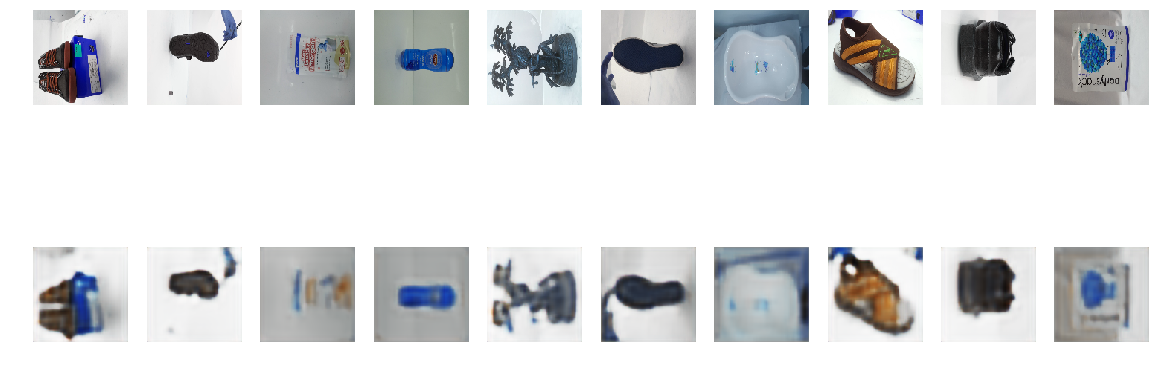

In [12]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_set[i])
  plt.gray()
  ax.set_axis_off()

  # display reconstruction
  ax = plt.subplot(2, n, i + n + 1)
  plt.imshow(decoded_imgs[i])
  plt.gray()
  ax.set_axis_off()

plt.show()


# Latent Space Visualization:

(4000, 16, 16, 8)


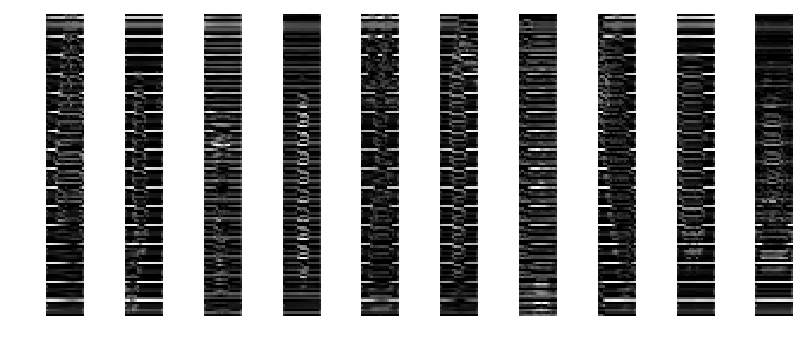

OSError: ignored

In [13]:
# take a look at the 128-dimensional encoded representation

encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(test_set)
print(encoded_imgs.shape)

n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
  ax = plt.subplot(1, n, i + 1)
  plt.imshow(encoded_imgs[i].reshape(16, 128).T)
  plt.gray()
  ax.set_axis_off()

plt.show()
encoder.save('/content/drive/My Drive/encoder.h5')

In [0]:
# save latent space features 128-d vector
pickle.dump(encoded_imgs, open('/content/drive/My Drive/conv_autoe_features.pickle', 'wb'))